In [9]:
import pandas as pd

import numpy as np
import plotly.graph_objects as go
import yfinance as yf 
import re, json, random

import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 


In [5]:
df = pd.read_csv("Results.csv", index_col=0)
df

,Unnamed: 0,Date Time,Stock,Curr_Price,Buy,Sell,Hold,Day1_Pred,closest_day1_price,actual_day1_close,day1_min_error,day1_act_error,made_profit_could_day_1,made_profit_act_day_1,Day3_Pred,closest_day3_price,actual_day3_close,day3_min_error,day3_act_error,made_profit_act_day_3,made_profit_could_day_3,Day7_Pred,closest_day7_price,actual_day7_close,day7_min_error,day7_act_error,made_profit_could_day_7,made_profit_act_day_7,Query,Advice,profit_1,profit_3,profit_7,Category,missed_opportunity_day1,missed_opportunity_day3,missed_opportunity_day7,Date
0,0,2025-07-03 00:00,NVDA,159.271103,0,1,0,162.50,159.160004,158.240005,2.098515,2.692110,1,1,165.80,164.285004,162.830002,0.922176,1.823987,0,0,170.20,167.500000,167.359894,1.611940,1.697005,0,0,1. I bought Nvidia (NVDA) at $960 but it’s now...,"Continue riding the AI wave, but consider trim...",True,False,False,Technology,0,0,0,2025-07-03
1,1,2025-07-03 00:00,AMZN,223.289993,1,0,0,230.00,224.220001,223.479996,2.577825,2.917489,1,1,235.00,224.199997,222.470001,4.817129,5.632219,0,1,240.00,224.740005,224.375595,6.790066,6.963505,1,1,2. With Amazon (AMZN) up after its Prime Day p...,"Buy now, as the stock is likely to continue it...",True,False,True,Consumer,0,1,0,2025-07-03
2,2,2025-07-03 00:00,TSLA,315.184998,0,0,1,310.23,295.929993,293.920013,4.832226,5.549124,0,0,308.56,299.359985,295.820007,3.073228,4.306670,0,0,306.89,306.910004,310.979187,0.006518,1.314939,0,0,3. Tesla (TSLA) just announced another price c...,Hold,False,False,False,EV Auto,0,0,0,2025-07-03
3,3,2025-07-03 00:00,AMD,137.949997,1,0,0,145.00,137.175003,134.830002,5.704390,7.542830,0,0,150.00,140.479095,138.449997,6.777453,8.342364,1,1,155.00,144.070007,144.047302,7.586584,7.603542,1,1,4. After the recent pullback in Advanced Micro...,"Buy, as the recent pullback in AMD presents an...",False,True,True,Technology,0,0,0,2025-07-03
4,4,2025-07-03 00:00,META,718.599976,0,0,1,732.00,726.505005,718.640015,0.756360,1.859065,1,1,745.00,737.109985,732.799988,1.070399,1.664849,1,1,760.00,724.315002,716.619995,4.926724,6.053418,1,0,5. Is Meta Platforms (META) still a good buy g...,"{'stock': 'META', 'reason': 'Meta Platforms, I...",True,True,False,Technology,0,0,1,2025-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,185,2025-07-03 00:00,ROST,131.649994,0,0,1,95.21,129.899994,130.770004,26.705154,27.192784,0,0,96.58,130.690002,131.210007,26.099933,26.392809,0,0,98.01,129.750000,129.860001,24.462428,24.526413,0,0,95. What’s the ideal weight for a 4-stock mix ...,"{'ideal_weight': {'ASML': 30, 'KLAC': 25, 'INT...",False,False,False,Consumer,0,0,0,2025-07-03
186,186,2025-07-03 00:00,EBAY,76.389999,0,1,0,74.50,75.288696,75.889999,1.047563,1.831598,1,1,73.20,75.170799,76.279999,2.621762,4.037754,1,1,72.50,76.339996,76.339996,5.030124,5.030124,1,1,"99. I’ve held eBay for a while, but I’m consid...",{'coming_day': 'Hold your position in EBAY for...,True,True,True,Consumer,0,0,0,2025-07-03
187,187,2025-07-03 00:00,ADP,308.959991,0,0,0,313.00,310.725006,308.489990,0.732157,1.461963,0,0,316.00,308.612488,308.410004,2.393783,2.461008,0,0,320.00,305.070007,304.149994,4.893956,5.211247,0,0,"100. I'm looking at ADP, NTES, and KLAC for lo...","Based on the analysis, I recommend investing i...",True,True,True,Technology,0,0,0,2025-07-03
188,188,2025-07-03 00:00,NTES,132.860001,1,0,0,137.00,134.154999,133.039993,2.120682,2.976554,1,1,140.00,131.050003,130.199997,6.829452,7.526884,0,0,144.00,128.860001,128.259995,11.749185,12.271952,0,0,"100. I'm looking at ADP, NTES, and KLAC for lo...","Based on the analysis, I recommend investing i...",True,False,False,Technology,0,0,0,2025-07-03


In [12]:
DAY1 = pd.to_datetime("07-07-2025", dayfirst=True)
DAY3 = pd.to_datetime("09-07-2025", dayfirst=True)
DAY7 = pd.to_datetime("11-07-2025", dayfirst=True)

DAY1 = DAY1.strftime(format="%Y-%m-%d %H:%M")
DAY3 = DAY3.strftime(format="%Y-%m-%d %H:%M")
DAY7 = DAY7.strftime(format="%Y-%m-%d %H:%M")


dates = [DAY1, DAY3, DAY7]

In [ ]:
stock_categories = {
    "Technology": [
        "AAPL", "ADBE", "ADP", "AMAT", "AMD", "AMZN", "ASML", "AVGO", "CDNS", "CRM",
        "CRWD", "CSGP", "CoStar Group", "DDOG", "DOCU", "GOOGL", "HOOD", "HUBS", "IDXX",
        "INTC", "Intuit", "KLAC", "LRCX", "Lam Research", "MCHP", "MDB", "META", "MRVL",
        "MSFT", "MU", "Microchip Technology", "NET", "NOW", "NTES", "NVDA", "OKTA", "ORCL",
        "PANW", "PINS", "PLTR", "QCOM", "QQQJ", "S", "SAP", "SIRI", "SNAP", "SNOW", "TEAM",
        "TSM", "VMW", "WDAY", "ZS"
    ],
    "EV Auto": ["LCID", "LYFT", "NIO", "RIVN", "TSLA"],
    "Healthcare": ["BIIB", "IDXX", "ILMN", "ISRG", "REGN", "Seagen", "VRTX"],
    "Consumer": [
        "ABNB", "AMZN", "CMG", "COST", "DASH", "DIS", "EBAY", "ETSY", "LYFT", "MCD",
        "MNST", "PDD", "ROST", "SBUX", "SHOP", "TGT", "UBER", "W", "WBD", "WMT", "eBay"
    ],
    "Semiconductors": [
        "AMAT", "KLAC", "LRCX", "Lam Research", "MCHP", "MRVL", "MU",
        "Microchip Technology", "TSM"
    ],
    "Media Entertainment": [
        "CMCSA", "DIS", "LYV", "NFLX", "PARA", "ROKU", "SIRI", "SPOT", "WBD"
    ],
    "FinTech": ["COIN", "FIS", "FISV", "INTU", "MA", "PYPL", "SQ", "V"],
    "Communications": ["CHTR", "CMCSA", "TMUS", "VZ"],
    "Real Estate": ["CSGP", "CoStar Group", "Redfin", "Z", "Zillow"],
    "Remote Work": ["DOCU", "PLTR", "TEAM", "ZM"],
    "Cybersecurity": ["CRWD", "PANW", "ZS"],
    "Cloud Data": ["DDOG", "DOCU", "NET", "SNOW"],
    "Real Estate": ["CSGP", "CoStar Group", "LYFT", "UBER"]}

In [180]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="EDA Report", explorative=True)
profile.to_file("eda_report.html")  # Saves a full report


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
print("Mean Profit day 1: ", df['profit_1'].mean()*100)
print("Mean Profit day 3: ", df['profit_3'].mean()*100)
print("Mean Profit day 7: ", df['profit_7'].mean()*100)

Mean Profit day 1:  47.486033519553075
Mean Profit day 3:  44.6927374301676
Mean Profit day 7:  40.78212290502793


In [7]:
print("MAPE of Day 1: ", df['day1_act_error'].mean())
print("MAPE of Day 3: ", df['day3_act_error'].mean())
print("MAPE of Day 7: ", df['day7_act_error'].mean())

MAPE of Day 1:  5.106324205411047
MAPE of Day 3:  6.9924488292775715
MAPE of Day 7:  14.92970427080869


In [6]:
print("People Who Depended Entirely For Day1: ", df['made_profit_act_day_1'].mean() * 100)
print("People Who Monitered For Day1: ", df['made_profit_could_day_1'].mean() * 100)
print("People Who Depended Entirely For Day3: ", df['made_profit_act_day_3'].mean() * 100)
print("People Who Monitered For Day3: ", df['made_profit_could_day_3'].mean() * 100)
print("People Who Depended Entirely For Day7: ", df['made_profit_act_day_7'].mean() * 100)
print("People Who Monitered For Day7: ", df['made_profit_could_day_7'].mean() * 100)

People Who Depended Entirely For Day1:  39.10614525139665
People Who Monitered For Day1:  52.513966480446925
People Who Depended Entirely For Day3:  37.988826815642454
People Who Monitered For Day3:  45.2513966480447
People Who Depended Entirely For Day7:  34.07821229050279
People Who Monitered For Day7:  37.43016759776536


In [185]:
df.describe()

,Unnamed: 0,Curr_Price,Buy,Sell,Hold,Day1_Pred,closest_day1_price,actual_day1_close,day1_min_error,day1_act_error,made_profit_could_day_1,made_profit_act_day_1,Day3_Pred,closest_day3_price,actual_day3_close,day3_min_error,day3_act_error,made_profit_act_day_3,made_profit_could_day_3,Day7_Pred,closest_day7_price,actual_day7_close,day7_min_error,day7_act_error,made_profit_could_day_7,made_profit_act_day_7,missed_opportunity_day1,missed_opportunity_day3,missed_opportunity_day7
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,175.000000,175.000000,175.000000,175.000000,180.000000,180.000000,180.000000,175.000000,175.000000,175.000000,175.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,92.633333,269.896905,0.300000,0.244444,0.327778,277.171944,277.191791,275.497027,3.862397,5.078481,0.527778,0.394444,282.071556,277.875816,276.618018,5.899240,6.956024,0.383333,0.455556,288.229333,285.779463,285.084467,14.288718,14.864559,0.377778,0.344444,0.222222,0.111111,0.055556
std,55.571978,295.568120,0.459536,0.430956,0.470713,295.767102,295.592935,294.709166,9.111745,9.024216,0.500620,0.490094,300.758027,296.089526,295.234772,9.130701,9.218969,0.487555,0.499410,307.378622,299.080867,298.520989,48.434587,48.855203,0.486184,0.476512,0.416899,0.315146,0.229700
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.050000,2.060000,2.105000,0.000000,0.072126,0.000000,0.000000,2.000000,2.260000,2.285000,0.000000,0.081876,0.000000,0.000000,1.950000,2.300300,2.310600,0.000000,0.049428,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.750000,76.389999,0.000000,0.000000,0.000000,81.125000,78.835499,77.650002,0.585370,1.578439,0.000000,0.000000,82.000000,79.489998,79.550003,1.828626,2.633553,0.000000,0.000000,85.000000,75.839996,74.815002,4.169922,4.479263,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90.500000,133.614998,0.000000,0.000000,0.000000,141.425000,137.470001,136.970001,1.908839,3.026398,1.000000,0.000000,146.855000,140.479095,138.449997,3.899341,4.786215,0.000000,0.000000,154.500000,144.152802,143.507805,7.378127,7.731600,0.000000,0.000000,0.000000,0.000000,0.000000
75%,139.500000,315.184998,1.000000,0.000000,1.000000,325.500000,318.000000,317.955002,3.680538,5.050358,1.000000,1.000000,333.802500,321.139954,319.720001,6.760565,7.827663,1.000000,1.000000,344.865000,322.955414,322.329987,13.867228,14.063129,1.000000,1.000000,0.000000,0.000000,0.000000
max,189.000000,1297.180054,1.000000,1.000000,1.000000,1345.000000,1291.376587,1289.069946,68.417134,68.606981,1.000000,1.000000,1370.000000,1288.250000,1288.250000,67.245538,67.359586,1.000000,1.000000,1400.000000,1255.189941,1249.574951,636.613899,643.077945,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:

stock_group =  df.groupby('Category')
summary = stock_group.agg({
    'profit_1': 'mean',
    'profit_3': 'mean',
    'profit_7': 'mean',
    'day1_act_error': 'mean',
    'day3_act_error': 'mean',
    'day7_act_error': 'mean',
    'Buy': 'sum',
    'Sell': 'sum',
    'Hold': 'sum'
}).sort_values(['day7_act_error','day3_act_error','day1_act_error'], ascending=True)

summary


,profit_1,profit_3,profit_7,day1_act_error,day3_act_error,day7_act_error,Buy,Sell,Hold
Category,,,,,,,,,
Communications,0.333333,0.333333,0.333333,2.990975,4.465036,8.154269,1,0,1
Consumer,0.640000,0.520000,0.520000,3.673168,6.496962,8.344408,7,9,7
Media Entertainment,0.181818,0.272727,0.363636,3.485929,6.089635,10.980600,3,2,5
Remote Work,0.750000,0.750000,0.750000,4.231767,6.225163,12.715591,3,1,0
Real Estate,0.400000,0.500000,0.500000,2.724597,6.089858,13.080340,1,2,6
Cloud Data,0.300000,0.600000,0.300000,4.493156,5.511763,13.645804,1,3,6
Semiconductors,0.346154,0.384615,0.461538,9.050957,9.366045,14.203725,9,7,6
Cybersecurity,0.750000,0.500000,0.500000,3.409976,4.868002,14.931417,2,2,0
Healthcare,0.272727,0.363636,0.363636,3.135470,4.853551,15.875212,1,3,6


In [7]:

stock_group =  df.groupby('Buy')
summary = stock_group.agg({
    'profit_1': 'mean',
    'profit_3': 'mean',
    'profit_7': 'mean',
    'day1_act_error': 'mean',
    'day3_act_error': 'mean',
    'day7_act_error': 'mean',
    'Buy': 'sum',
    'Sell': 'sum',
    'Hold': 'sum'
}).sort_values(['profit_1', 'profit_3', 'profit_7'], ascending=False)

summary


,profit_1,profit_3,profit_7,day1_act_error,day3_act_error,day7_act_error,Buy,Sell,Hold
Buy,,,,,,,,,
0,0.544000,0.488000,0.432000,5.729603,7.676215,17.669509,0,44,58
1,0.314815,0.351852,0.351852,3.721260,5.472969,8.587564,54,0,0


In [8]:

stock_group =  df.groupby('Sell')
summary = stock_group.agg({
    'profit_1': 'mean',
    'profit_3': 'mean',
    'profit_7': 'mean',
    'day1_act_error': 'mean',
    'day3_act_error': 'mean',
    'day7_act_error': 'mean',
    'Buy': 'sum',
    'Sell': 'sum',
    'Hold': 'sum'
}).sort_values(['profit_1', 'profit_3', 'profit_7'], ascending=False)

summary


,profit_1,profit_3,profit_7,day1_act_error,day3_act_error,day7_act_error,Buy,Sell,Hold
Sell,,,,,,,,,
1,0.909091,0.522727,0.522727,3.083334,4.557476,7.224321,0,44,0
0,0.333333,0.422222,0.370370,5.791029,7.816593,17.441089,54,0,58


In [12]:

stock_group =  df.groupby('Hold')
summary = stock_group.agg({
    'profit_1': 'mean',
    'profit_3': 'mean',
    'profit_7': 'mean',
    'day1_act_error': 'mean',
    'day3_act_error': 'mean',
    'day7_act_error': 'mean',
    'Buy': 'sum',
    'Sell': 'sum',
    'Hold': 'sum'
}).sort_values(['profit_1', 'profit_3', 'profit_7'], ascending=False)

summary


,profit_1,profit_3,profit_7,day1_act_error,day3_act_error,day7_act_error,Buy,Sell,Hold
Hold,,,,,,,,,
0,0.595041,0.446281,0.446281,3.819893,5.655145,15.580810,54,44,0
1,0.224138,0.448276,0.327586,7.679187,9.667056,13.571363,0,0,58


In [14]:
stock_group = df.groupby("Category")
summary = stock_group.agg({
    'profit_1': 'mean',
    'profit_3': 'mean',
    'profit_7': 'mean',
    'day1_act_error': 'mean',
    'day3_act_error': 'mean',
    'day7_act_error': 'mean',
    'Buy': 'mean',
    'Sell': 'mean',
    'Hold': 'mean'
}).sort_values(['Buy', 'Sell', 'Hold'], ascending=False)#['profit_1', 'profit_3', 'profit_7'], ascending=False)

summary

,profit_1,profit_3,profit_7,day1_act_error,day3_act_error,day7_act_error,Buy,Sell,Hold
Category,,,,,,,,,
Remote Work,0.750000,0.750000,0.750000,4.231767,6.225163,12.715591,0.750000,0.250000,0.000000
Cybersecurity,0.750000,0.500000,0.500000,3.409976,4.868002,14.931417,0.500000,0.500000,0.000000
Technology,0.508772,0.456140,0.333333,3.860328,5.228953,18.878890,0.368421,0.263158,0.263158
Semiconductors,0.346154,0.384615,0.461538,9.050957,9.366045,14.203725,0.346154,0.269231,0.230769
FinTech,0.777778,0.333333,0.333333,10.275989,13.703404,18.740499,0.333333,0.000000,0.444444
Communications,0.333333,0.333333,0.333333,2.990975,4.465036,8.154269,0.333333,0.000000,0.333333
Consumer,0.640000,0.520000,0.520000,3.673168,6.496962,8.344408,0.280000,0.360000,0.280000
Media Entertainment,0.181818,0.272727,0.363636,3.485929,6.089635,10.980600,0.272727,0.181818,0.454545
EV Auto,0.555556,0.444444,0.444444,10.232581,14.456597,16.891394,0.222222,0.000000,0.222222


In [11]:
stocks = list(df['Stock'])
def draw_graph(stock, df, dates):
    data = yf.download(stock, interval = '1d',period='1mo')
    data.columns = data.columns.droplevel(1)
    data = data.reset_index()[['Date', 'Close', 'High', 'Low', 'Open']]
    data['Date'] = data['Date'] + pd.to_timedelta("00:00:00")


    end_date = pd.to_datetime("2025-07-12")


    data = data[(data['Date'] >= df.iloc[0]['Date Time']) & (data['Date'] <= end_date)]

    ovr_data =  [df['Day1_Pred'].iloc[0], df['Day3_Pred'].iloc[0] ,df['Day7_Pred'].iloc[0]]

    dates = pd.to_datetime(dates)


    fig =go.Figure()
    
    adv  = ''
    if (df['Buy'].iloc[0] == 1):
        adv = 'Buy'
    elif (df['Sell'].iloc[0] == 1):
        adv = 'Sell'
    else:
        adv = 'Hold'

    fig.update_layout(
        title=f"{stock}  Adv: {adv}",
        xaxis_title="Date",
        yaxis_title="Price",
        xaxis_tickangle= -90,
        #yaxis=dict(range=[0, data['Close'].max() * 1.1]) ,
        legend=dict(x=0.01, y=0.99),
        hovermode="x unified",
        template="plotly_white"
    )


    profit_data = [df['profit_1'].iloc[0], df['profit_3'].iloc[0], df['profit_7'].iloc[0]]
    profit_data = ["Profit" if x > 0 else "Loss" for x in profit_data]

    fig.add_trace(go.Scatter(
        x=dates,
        y=[df['Curr_Price'].iloc[0]] * len(dates),  # anchor text at current price
        mode='text',
        text=profit_data,
        textposition="top right",
        showlegend=False,
        textfont=dict(color="blue", size=12)
    ))

    # Plot actual data
    fig.add_trace(go.Scatter(
        x=data['Date'], y=data['Close'],
        mode='lines+markers',
        name='Actual',
        line=dict(color='green')
    ))

    # Plot predicted data
    fig.add_trace(go.Scatter(
        x=dates, y=ovr_data,
        mode='lines+markers',
        name='Predictions',
        line=dict(color='red', dash='dash')
    ))

    fig.show()


     


# for _ in range(3):
#     draw_graph(random.choice(stocks), df, numerical_df, dates)
rnd_row = pd.DataFrame(df.iloc[random.randint(0, 190)]).T
draw_graph(rnd_row['Stock'].iloc[0], rnd_row, dates)



NameError: name 'dates' is not defined

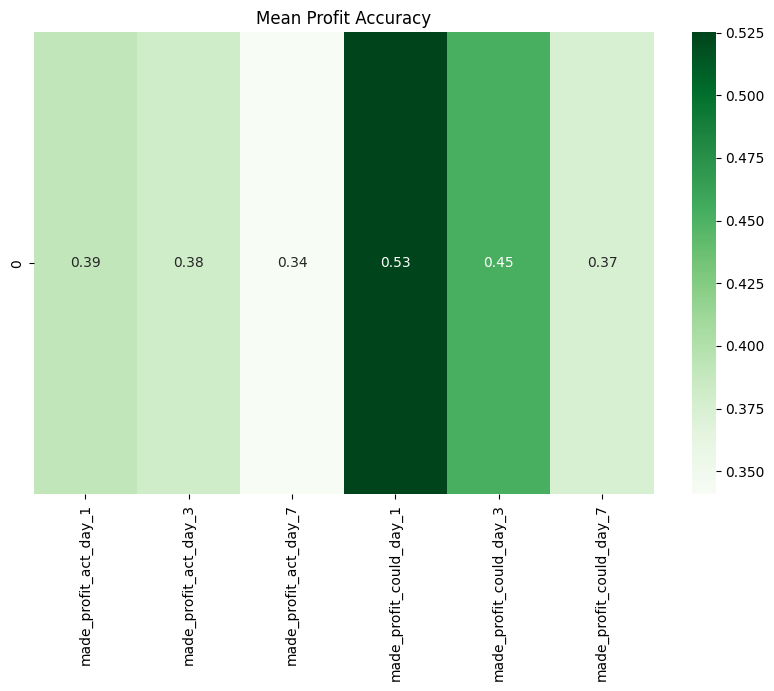

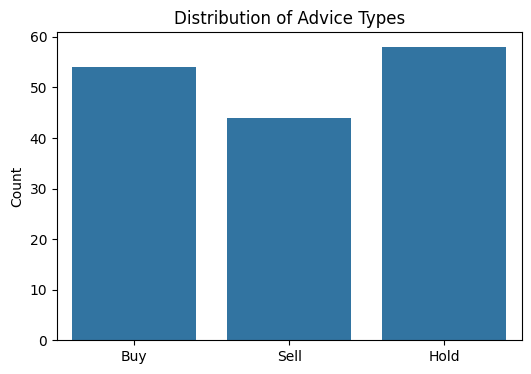

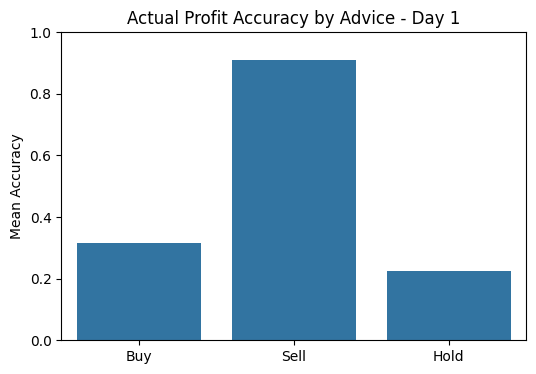

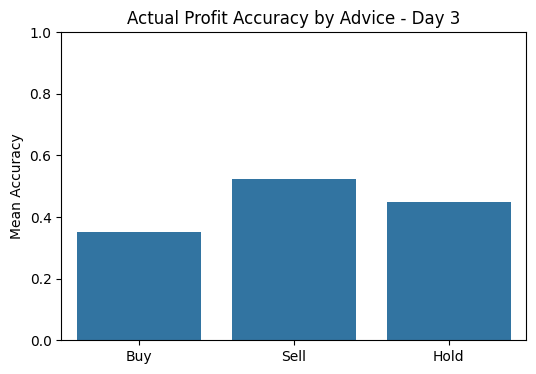

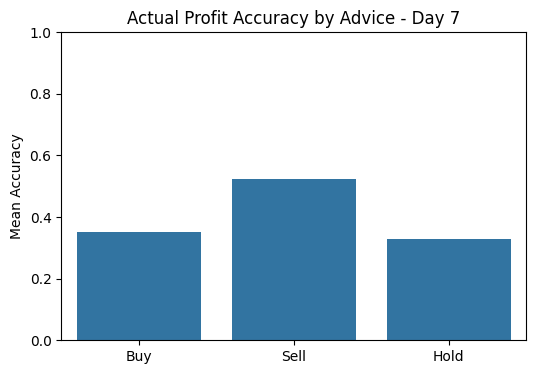

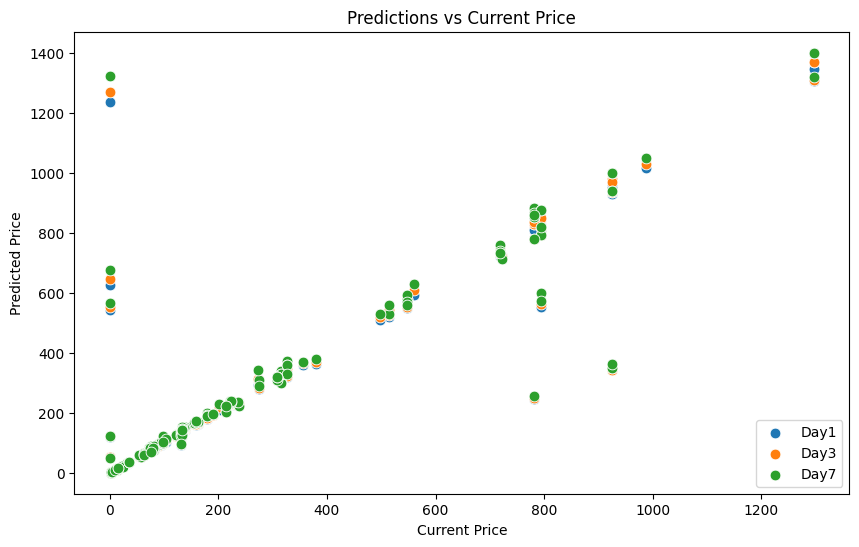

In [18]:


# Load your DataFrame (replace with your file if needed)
# df = pd.read_csv("your_data.csv")

# Create profit indicators
df['made_profit_act_day_1'] = (
    ((df['Buy'] == 1) & (df['actual_day1_close'] > df['Curr_Price'])) |
    ((df['Sell'] == 1) & (df['actual_day1_close'] < df['Curr_Price'])) |
    ((df['Hold'] == 1) & (df['actual_day1_close'] >= df['Curr_Price']))
).astype(int)

df['made_profit_could_day_1'] = (
    ((df['Buy'] == 1) & (df['closest_day1_price'] > df['Curr_Price'])) |
    ((df['Sell'] == 1) & (df['closest_day1_price'] < df['Curr_Price'])) |
    ((df['Hold'] == 1) & (df['closest_day1_price'] >= df['Curr_Price']))
).astype(int)

# Repeat for day 3 and day 7
df['made_profit_act_day_3'] = (
    ((df['Buy'] == 1) & (df['actual_day3_close'] > df['Curr_Price'])) |
    ((df['Sell'] == 1) & (df['actual_day3_close'] < df['Curr_Price'])) |
    ((df['Hold'] == 1) & (df['actual_day3_close'] >= df['Curr_Price']))
).astype(int)

df['made_profit_could_day_3'] = (
    ((df['Buy'] == 1) & (df['closest_day3_price'] > df['Curr_Price'])) |
    ((df['Sell'] == 1) & (df['closest_day3_price'] < df['Curr_Price'])) |
    ((df['Hold'] == 1) & (df['closest_day3_price'] >= df['Curr_Price']))
).astype(int)

df['made_profit_act_day_7'] = (
    ((df['Buy'] == 1) & (df['actual_day7_close'] > df['Curr_Price'])) |
    ((df['Sell'] == 1) & (df['actual_day7_close'] < df['Curr_Price'])) |
    ((df['Hold'] == 1) & (df['actual_day7_close'] >= df['Curr_Price']))
).astype(int)

df['made_profit_could_day_7'] = (
    ((df['Buy'] == 1) & (df['closest_day7_price'] > df['Curr_Price'])) |
    ((df['Sell'] == 1) & (df['closest_day7_price'] < df['Curr_Price'])) |
    ((df['Hold'] == 1) & (df['closest_day7_price'] >= df['Curr_Price']))
).astype(int)

# ---------------------
# Plotting
# ---------------------

# Heatmap of profit outcomes
plt.figure(figsize=(10,6))
sns.heatmap(df[[
    'made_profit_act_day_1','made_profit_act_day_3','made_profit_act_day_7',
    'made_profit_could_day_1','made_profit_could_day_3','made_profit_could_day_7']].mean().to_frame().T,
    annot=True, cmap='Greens')
plt.title("Mean Profit Accuracy")
plt.show()

# Advice type distribution
plt.figure(figsize=(6,4))
advice_counts = [df['Buy'].sum(), df['Sell'].sum(), df['Hold'].sum()]
sns.barplot(x=['Buy', 'Sell', 'Hold'], y=advice_counts)
plt.title("Distribution of Advice Types")
plt.ylabel("Count")
plt.show()

# Profit by advice and day
days = [1, 3, 7]
for day in days:
    plt.figure(figsize=(6,4))
    means = [
        df[df['Buy']==1][f'made_profit_act_day_{day}'].mean(),
        df[df['Sell']==1][f'made_profit_act_day_{day}'].mean(),
        df[df['Hold']==1][f'made_profit_act_day_{day}'].mean()
    ]
    sns.barplot(x=['Buy', 'Sell', 'Hold'], y=means)
    plt.title(f"Actual Profit Accuracy by Advice - Day {day}")
    plt.ylim(0,1)
    plt.ylabel("Mean Accuracy")
    plt.show()

# Scatter plot of predictions
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Curr_Price", y="Day1_Pred", label="Day1", s=60)
sns.scatterplot(data=df, x="Curr_Price", y="Day3_Pred", label="Day3", s=60)
sns.scatterplot(data=df, x="Curr_Price", y="Day7_Pred", label="Day7", s=60)
plt.xlabel("Current Price")
plt.ylabel("Predicted Price")
plt.title("Predictions vs Current Price")
plt.legend()
plt.show()

# 3D plot of predictions
fig = px.scatter_3d(df, x='Curr_Price', y='Day3_Pred', z='Day7_Pred',
                    color='Category', title='Prediction Comparison in 3D')
fig.show()


Category
Technology             18.878890
FinTech                18.740499
EV Auto                16.891394
Healthcare             15.875212
Cybersecurity          14.931417
Semiconductors         14.203725
Cloud Data             13.645804
Real Estate            13.080340
Remote Work            12.715591
Media Entertainment    10.980600
Consumer                8.344408
Communications          8.154269
Name: day7_act_error, dtype: float64


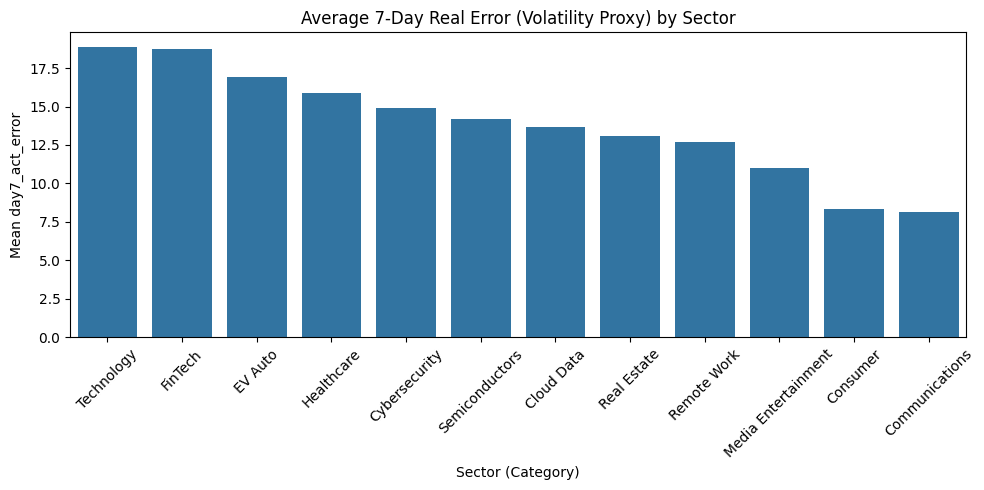

In [19]:
# You can use day7_act_error as a proxy for volatility
volatility_df = df.groupby('Category')['day7_act_error'].mean().sort_values(ascending=False)
print(volatility_df)

plt.figure(figsize=(10, 5))
sns.barplot(x=volatility_df.index, y=volatility_df.values)
plt.xticks(rotation=45)
plt.title("Average 7-Day Real Error (Volatility Proxy) by Sector")
plt.ylabel("Mean day7_act_error")
plt.xlabel("Sector (Category)")
plt.tight_layout()
plt.show()


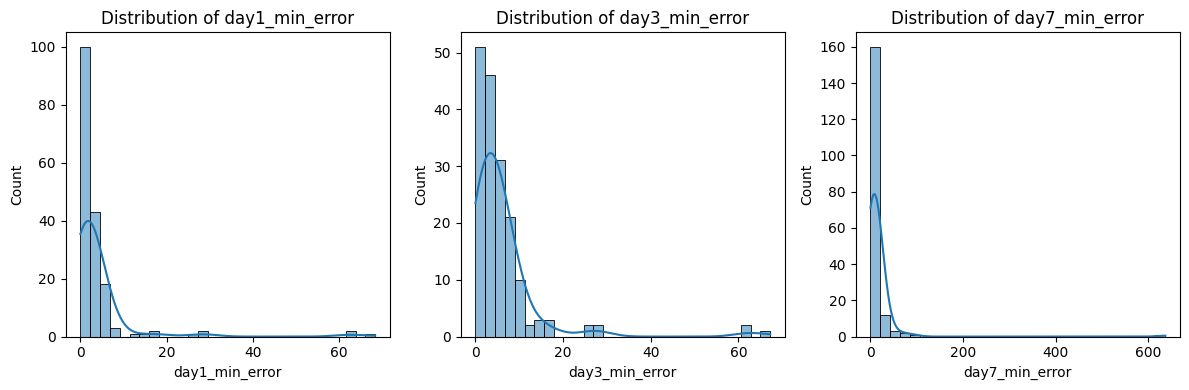

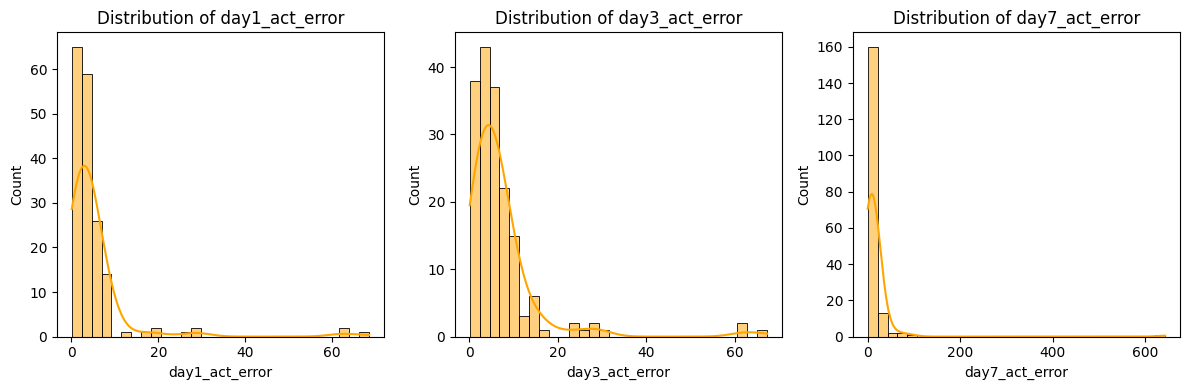

In [20]:

plt.figure(figsize=(12, 4))
for i, col in enumerate(['day1_min_error', 'day3_min_error', 'day7_min_error']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
for i, col in enumerate(['day1_act_error', 'day3_act_error', 'day7_act_error']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='orange')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


{'Day 1': np.float64(22.3463687150838), 'Day 3': np.float64(11.1731843575419), 'Day 7': np.float64(5.58659217877095)}


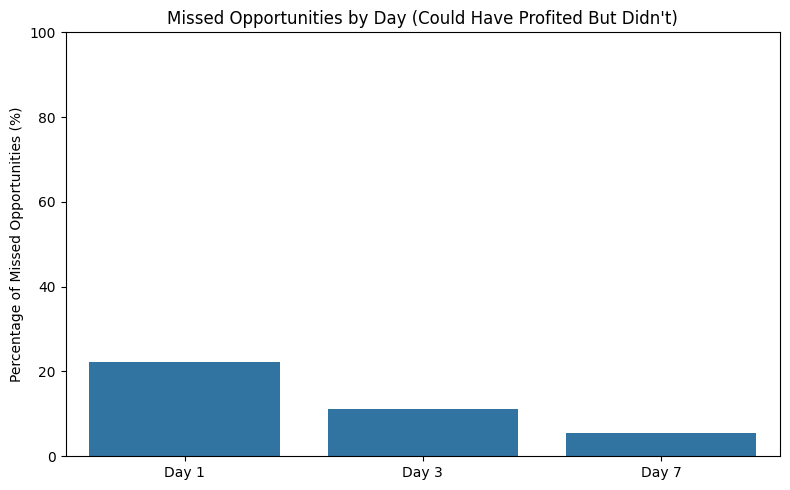

In [21]:
for day in [1, 3, 7]:
    df[f'missed_opportunity_day{day}'] = (
        (df[f'made_profit_could_day_{day}'] == 1) & 
        (df[f'made_profit_act_day_{day}'] == 0)
    ).astype(int)

# Calculate percentage missed opportunities
missed_opportunity_percent = {
    f'Day {day}': 100 * df[f'missed_opportunity_day{day}'].mean()
    for day in [1, 3, 7]
}
print(missed_opportunity_percent)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=list(missed_opportunity_percent.keys()), y=list(missed_opportunity_percent.values()))
plt.title("Missed Opportunities by Day (Could Have Profited But Didn't)")
plt.ylabel("Percentage of Missed Opportunities (%)")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

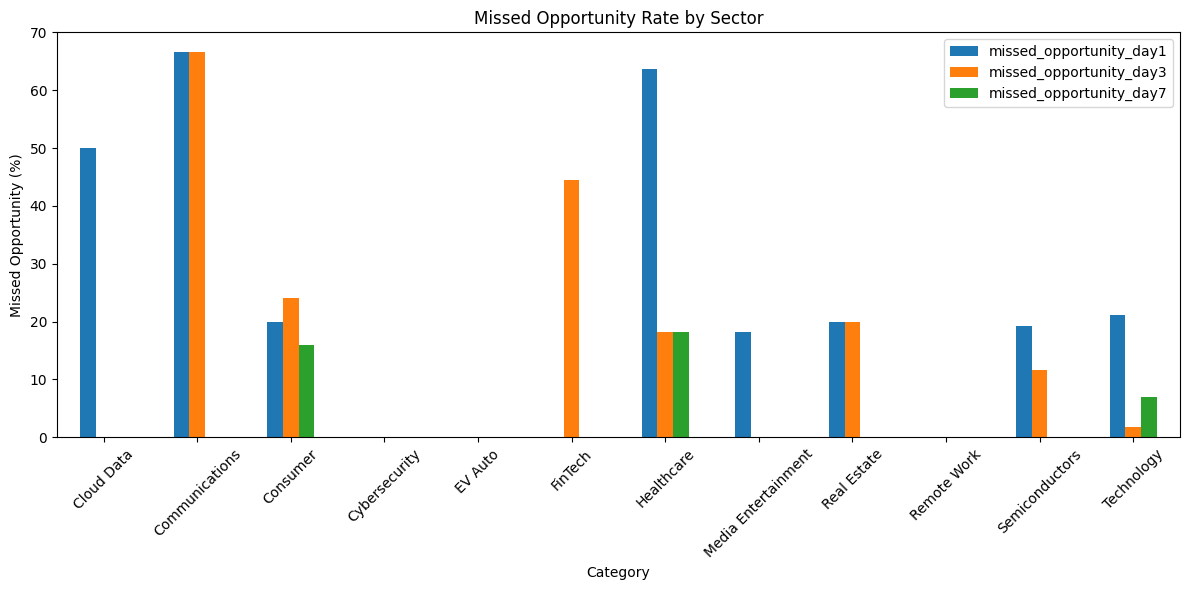

In [22]:
missed_by_sector = df.groupby('Category')[
    ['missed_opportunity_day1', 'missed_opportunity_day3', 'missed_opportunity_day7']
].mean() * 100

missed_by_sector.plot(kind='bar', figsize=(12, 6))
plt.title("Missed Opportunity Rate by Sector")
plt.ylabel("Missed Opportunity (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [233]:
print("MAPE of Day 1: ", df['day1_act_error'].mean())
print("MAPE of Day 3: ", df['day3_act_error'].mean())
print("MAPE of Day 7: ", df['day7_act_error'].mean())

MAPE of Day 1:  5.106324205411047
MAPE of Day 3:  6.9924488292775715
MAPE of Day 7:  14.92970427080869


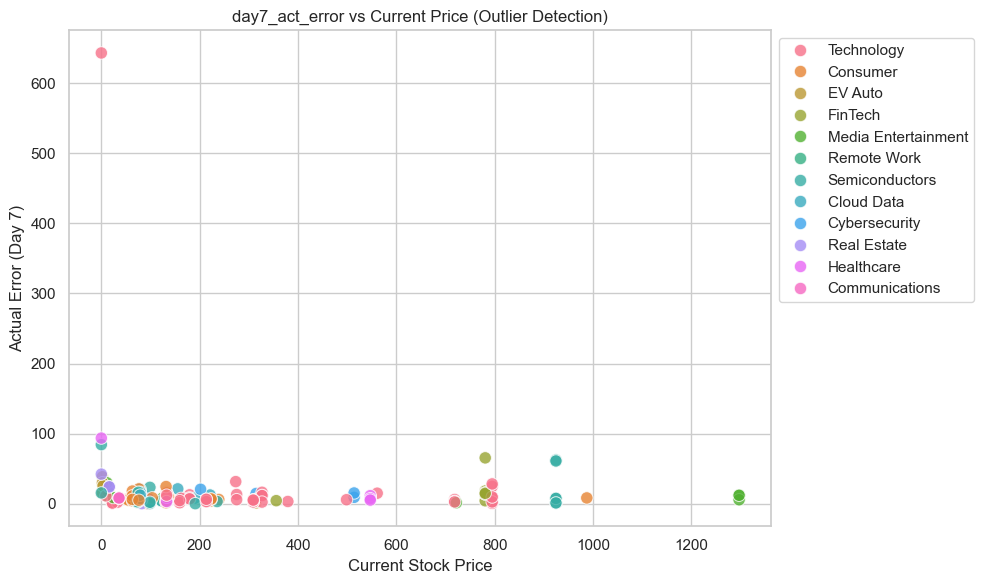

In [234]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Curr_Price', y='day7_act_error', hue='Category', alpha=0.8, s=80)
plt.title('day7_act_error vs Current Price (Outlier Detection)')
plt.xlabel('Current Stock Price')
plt.ylabel('Actual Error (Day 7)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


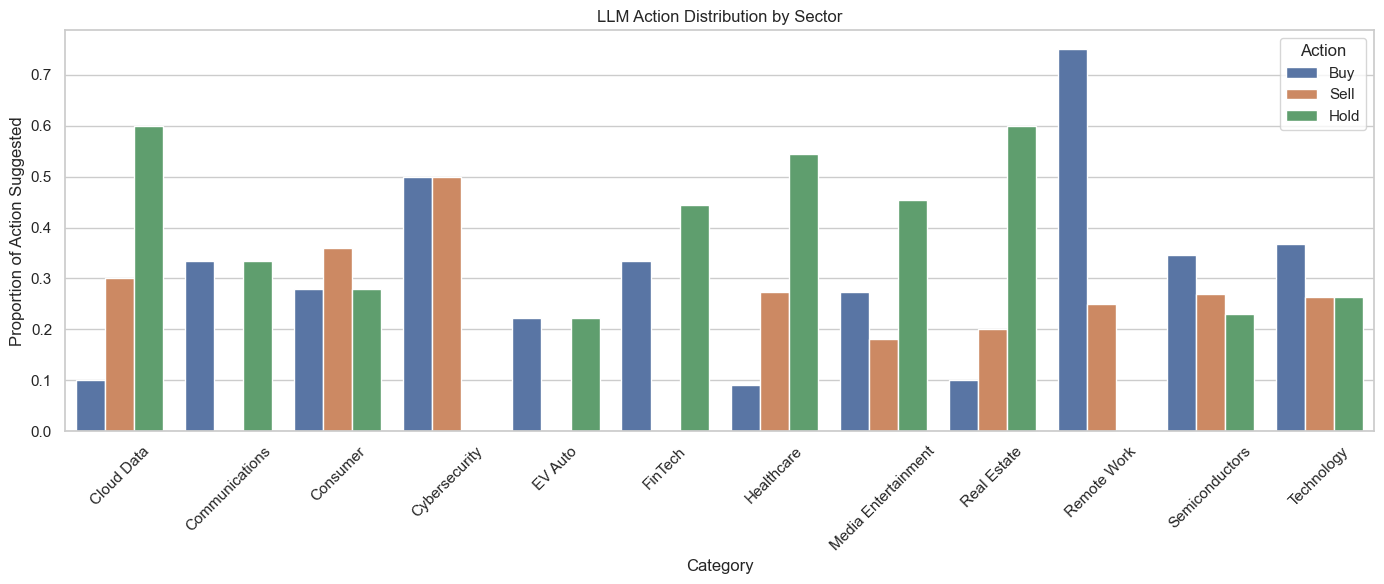

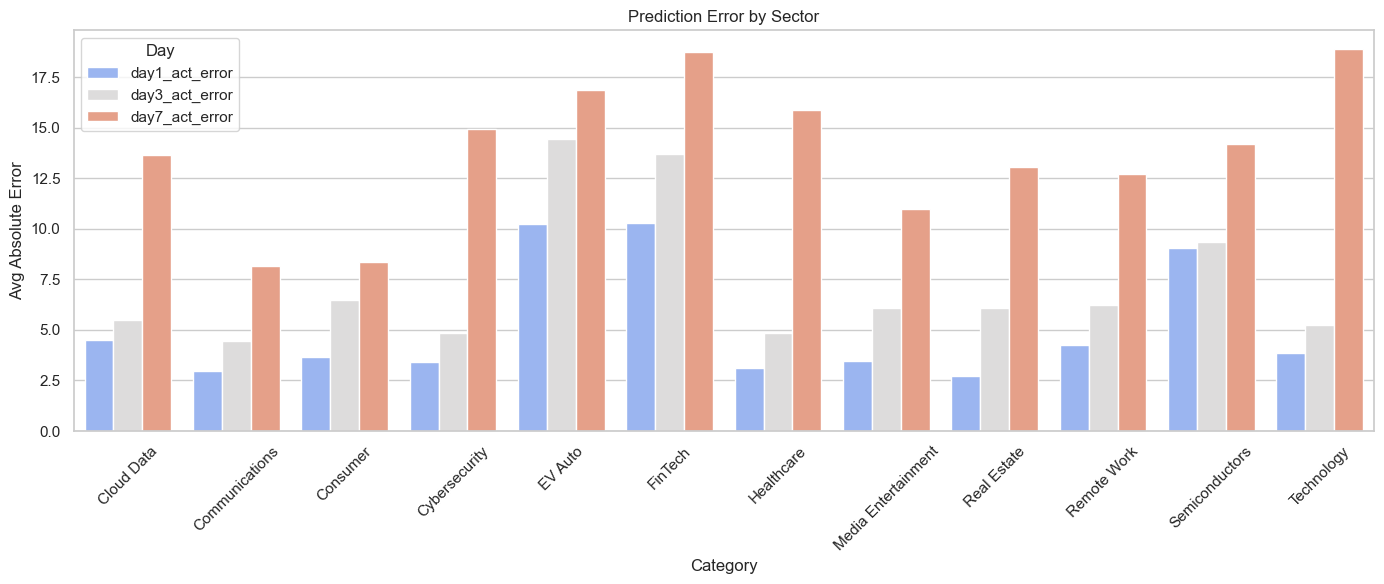

In [23]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 1️⃣ Summarize dataframe by sector
summary_df = df.groupby('Category').agg({
    'profit_1': 'mean', 'profit_3': 'mean', 'profit_7': 'mean',
    'day1_act_error': 'mean', 'day3_act_error': 'mean', 'day7_act_error': 'mean',
    'day1_min_error': 'mean', 'day3_min_error': 'mean', 'day7_min_error': 'mean',
    'made_profit_could_day_1': 'mean', 'made_profit_act_day_1': 'mean',
    'made_profit_could_day_3': 'mean', 'made_profit_act_day_3': 'mean',
    'made_profit_could_day_7': 'mean', 'made_profit_act_day_7': 'mean',
    'Buy': 'mean', 'Sell': 'mean', 'Hold': 'mean'
}).reset_index()

action_df = summary_df.melt(id_vars='Category', value_vars=['Buy', 'Sell', 'Hold'],
                            var_name='Action', value_name='Proportion')

plt.figure(figsize=(14, 6))
sns.barplot(data=action_df, x='Category', y='Proportion', hue='Action')
plt.title("LLM Action Distribution by Sector")
plt.xticks(rotation=45)
plt.ylabel("Proportion of Action Suggested")
plt.tight_layout()
plt.show()

error_df = summary_df.melt(id_vars='Category', 
                           value_vars=['day1_act_error', 'day3_act_error', 'day7_act_error'],
                           var_name='Day', value_name='Error')

plt.figure(figsize=(14, 6))
sns.barplot(data=error_df, x='Category', y='Error', hue='Day', palette='coolwarm')
plt.title("Prediction Error by Sector")
plt.xticks(rotation=45)
plt.ylabel("Avg Absolute Error")
plt.tight_layout()
plt.show()


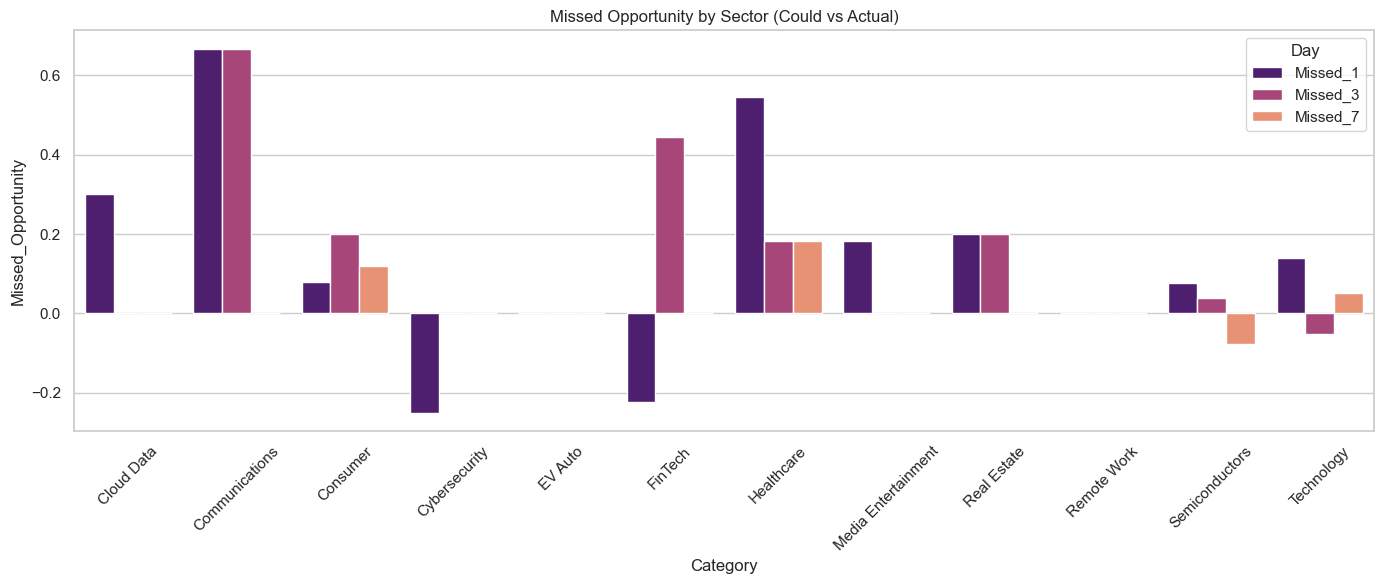

In [24]:
missed_df = pd.DataFrame({
    'Category': summary_df['Category'],
    'Missed_1': summary_df['made_profit_could_day_1'] - summary_df['made_profit_act_day_1'],
    'Missed_3': summary_df['made_profit_could_day_3'] - summary_df['made_profit_act_day_3'],
    'Missed_7': summary_df['made_profit_could_day_7'] - summary_df['made_profit_act_day_7']
})

missed_melted = missed_df.melt(id_vars='Category', var_name='Day', value_name='Missed_Opportunity')

plt.figure(figsize=(14, 6))
sns.barplot(data=missed_melted, x='Category', y='Missed_Opportunity', hue='Day', palette='magma')
plt.title("Missed Opportunity by Sector (Could vs Actual)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig = px.scatter(
    summary_df,
    x='day1_act_error',
    y='profit_1',
    color='Category',
    size='Buy',
    hover_data=['Sell', 'Hold', 'day3_act_error', 'profit_3'],
    title="Profit vs Error (Day 1) by Sector (Bubble Size = Buy %)"
)
fig.show()

